<a href="https://colab.research.google.com/github/chasuar/Raspberry_study/blob/main/2_MNIST_tutorial_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST+CNN





In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y)=mnist.load_data()
train_x, test_x=train_x/255.0, test_x/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
print(train_x.shape)

(60000, 28, 28, 1)


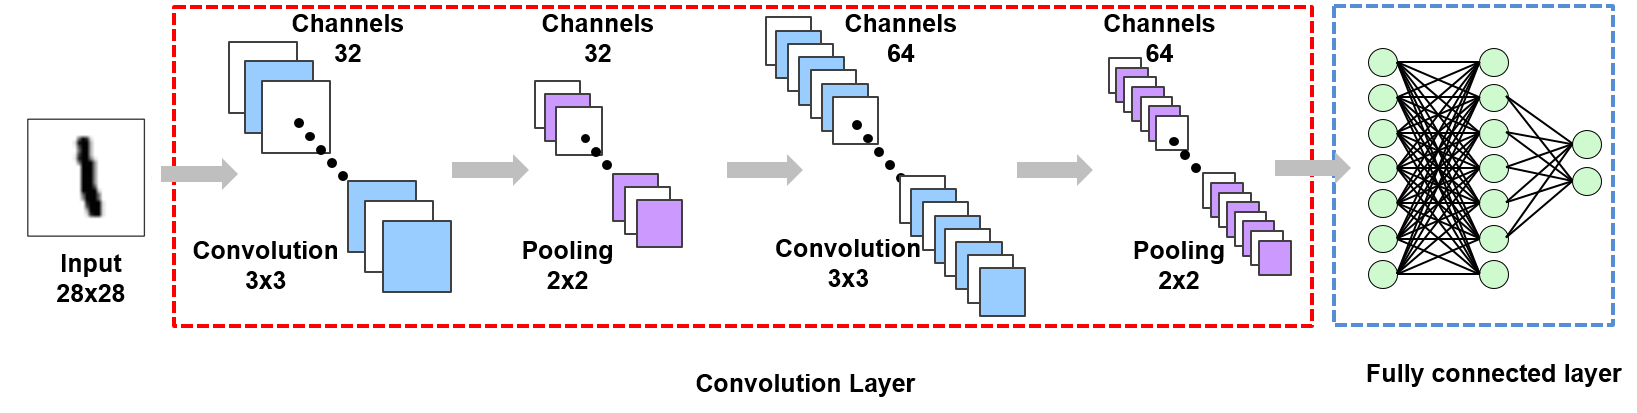

In [ ]:
# 딥러닝 모델 구조 설정
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (28, 28, 1)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [ ]:
#모델 구조 확인

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
#모델 컴파일
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 3/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0075 - accuracy: 0.9975


In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)


313/313 [==============================] - 2s 4ms/step - loss: 0.0436 - accuracy: 0.9887


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


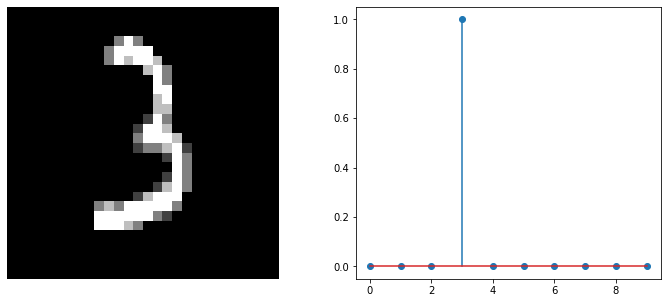

Prediction : 3


In [ ]:
test_img = test_x[[1495]]

predict = model.predict_on_batch(test_img)
mypred = np.argmax(predict, axis = 1)

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28, 28), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()

print('Prediction : {}'.format(mypred[0]))

In [ ]:
#모델 저장
model.save('Predict_Model.h5')